In [8]:
import os  
import cv2

**CODE WAS BUILD IN PYTHON 3.9.6**

In [3]:
import sys
!{sys.executable} -m pip install opencv-python
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 54.8 MB 43.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 1.0 MB/s eta 0:00:01     |████████████████████████▏       | 180.7 MB 1.1 MB/s eta 0:00:54
     |████████████████████████████████| 133 kB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 414 kB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 64 kB 13.6 MB/s eta 0:00:01
     |██████████████████

THIS CODE IS ONLY USE FOR DOWLOADING AND LABELING DATA DO NOT RE_USE IF WE HAVE ALREADY DOWLOADED!!!!!!!!!!

In [14]:
os.makedirs('./CRDD2022_all_countries', exist_ok=True)

In [15]:
ALL_2022 = {'Japan': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_Japan.zip',
            'India': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_India.zip',
            'Czech': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_Czech.zip',
            'Norway': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_Norway.zip',
            'United_States': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_United_States.zip',
            'China_MotorBike': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_China_MotorBike.zip',
            'China_Drone': 'https://bigdatacup.s3.ap-northeast-1.amazonaws.com/2022/CRDDC2022/RDD2022/Country_Specific_Data_CRDDC2022/RDD2022_China_Drone.zip'}

import urllib.request
from tqdm import tqdm
print('Dowload Stage')
for country_name, url in tqdm(ALL_2022.items()):
    urllib.request.urlretrieve(url, f'./CRDD2022_all_countries/{country_name}.zip')

Dowload Stage


100%|██████████| 7/7 [30:34<00:00, 262.07s/it]


In [1]:
import zipfile 
import shutil
all_file = "Collect_File/"

In [59]:
#unzip all of the file
os.makedirs('./Collect_File',exist_ok=True)
dict = "CRDD2022_all_countries/"

for file in os.listdir(dict): 
    file_path = os.path.join(dict,file) 

    if file.endswith(".zip"): 
        with zipfile.ZipFile(file_path,"r") as zip: 
            zip.extractall("Collect_File")
            print(f"file {file} have been unzip")

file Japan.zip have been unzip
file United_States.zip have been unzip
file Norway.zip have been unzip
file India.zip have been unzip
file China_MotorBike.zip have been unzip
file China_Drone.zip have been unzip
file Czech.zip have been unzip


In [2]:
import os 
import sys
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import tqdm
import pandas as pd

In [17]:
def get_all_xml():
    _allFILE = "Collect_File/"
#   get_and_STOREDATA
    _all_test = { 
        "file_name": [],
        "images": [], 
        "height": [],
        "width": [], 
        "detect": [], 
    } 
    
    stats = {
        'x': [], 
        'y': [], 
        'h': [], 
        'w': [], 
        
    }

    _trial_value = {
        "images": [],
        "type": []
    }

    for _allnameFILE in os.listdir(_allFILE): 
        _allnameFILElink = os.path.join(_allFILE,_allnameFILE + "/train/annotations/xmls") 
        print(f"FILE {_allnameFILE} loading...")

        for _allfile in os.listdir(_allnameFILElink):
            __xmlfile = os.path.join(_allnameFILElink,_allfile) 
            tree = ET.parse(__xmlfile)

            #   made file name... 
            _all_test["file_name"].append(_allnameFILE) 
            _all_test["images"].append(tree.find("filename").text) 
            _all_test["height"].append(int(tree.find("size").find("height").text))
            _all_test["width"].append(int(tree.find("size").find("width").text))

            _tmp = []
            
            #   add for all of the object that is valid for all the detections
            for object in tree.findall("object"):
                _type = object.find("name").text
                bbox = object.find("bndbox")
                xmin = float(bbox.find("xmin").text)
                ymin = float(bbox.find("ymin").text)
                xmax = float(bbox.find("xmax").text)
                ymax = float(bbox.find("ymax").text)
                x_center = (float(xmin + xmax) / 2) / _all_test["width"][-1]
                y_center = (float(ymin + ymax) / 2) / _all_test["height"][-1]
                w = (xmax - xmin) / _all_test["width"][-1]
                h = (ymax - ymin) / _all_test["height"][-1]
                
                stats["x"].append(x_center) 
                stats["y"].append(y_center) 
                stats["h"].append(h)
                stats["w"].append(w)
                
                
                obj = {
                    "type": _type, 
                    "x": x_center, 
                    "y": y_center, 
                    "w": w, 
                    "h": h,
                }

                if _type not in _trial_value["type"]:
                    _trial_value["images"].append(_all_test["images"][-1])
                    _trial_value["type"].append(_type)

                _tmp.append(obj) 

            _all_test["detect"].append(_tmp)
    
    return _all_test,_trial_value, stats

In [3]:
def get_img(file_name,train):
    _type = file_name.split('_')[0]
    _next = file_name.split('_')[1]
    if _type == "China" or _type == "United":
        _type = _type + '_' + _next
    path = f"Collect_File/{_type}/{train}/images/{file_name}"
    try:
        img = cv2.imread(path)
    except:
        print(f"file {file_name} is not found !") 
    return img 

In [4]:
def show_img(file_name,_all_tests):
    img = get_img(file_name,"train")
    fig,ax = plt.subplots()
    ax.imshow(img)

    index = _all_tests["images"].index(file_name)
    
    # Draw boxes
    _BOXES = _all_tests["detect"][index]
    h = _all_tests["height"][index]
    w = _all_tests["width"][index]

    for _BOX in _BOXES:
        x_start = w * (_BOX["x"] - _BOX["w"] / 2) 
        y_start = h * (_BOX["y"] - _BOX["h"] / 2)

        rectangle = pt.Rectangle(
            (x_start, y_start), _BOX["w"]*w, _BOX["h"]*h,
            linewidth=2, edgecolor='blue', facecolor='none'
        )
        ax.add_patch(rectangle)
        ax.text(x_start, y_start - 5, _BOX["type"], color='blue', fontsize=10, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(file_name)
    plt.grid()
    plt.show()

PRINT MODEL TESTING

In [18]:
#   Have to use this
_allXML,trial, stats = get_all_xml()

FILE Norway loading...
FILE Czech loading...
FILE China_Drone loading...
FILE China_MotorBike loading...
FILE United_States loading...
FILE Japan loading...
FILE India loading...


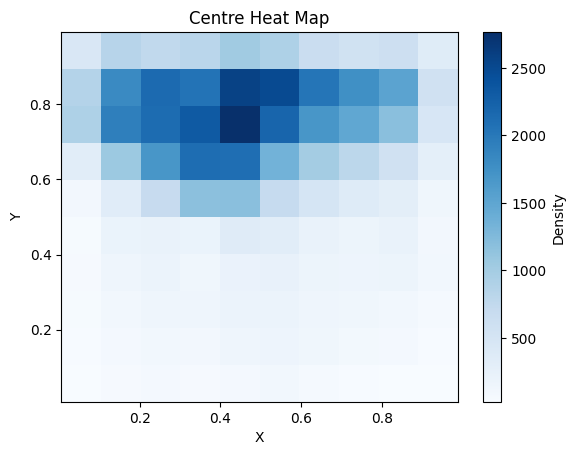

In [ ]:
# plot the heatmap for the centre 
plt.hist2d(stats['x'],stats['y'],cmap = 'Blues')
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Centre Heat Map')
plt.show()  

{'type': 'D00', 'x': 0.4244166895415866, 'y': 0.7871876531112201, 'w': 0.059044743343398334, 'h': 0.4158255756981872}


KeyError: 'Repair'

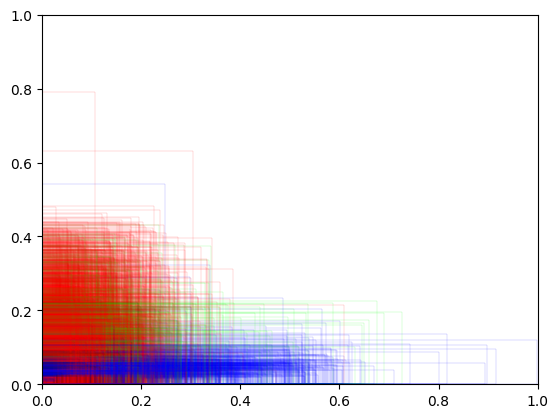

In [ ]:
color = {
    "D00": (1.0, 0.0, 0.0, 1.0),  # Red with full opacity
    "D10": (0.0, 0.0, 1.0, 1.0),  # Blue with full opacity
    "D20": (0.0, 1.0, 0.0, 1.0),  # Yellow with full opacity
    "D40": (0.0, 0.0, 0.0, 1.0),  # Black with full opacity
}

fig,ax = plt.subplots() 
bboxss = _allXML['detect']
print(bboxss[1][0])



for bboxs in bboxss:
    for bbox in bboxs:  
        type = bbox['type']
        rec = pt.Rectangle(
            (0,0), 
            bbox['w'],
            bbox['h'],  
            linewidth=0.1, edgecolor=color[type], facecolor='none',
            fill=False   
        )
        ax.add_patch(rec)   
        
 
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.axis('off')

# Show the plot
plt.show() 


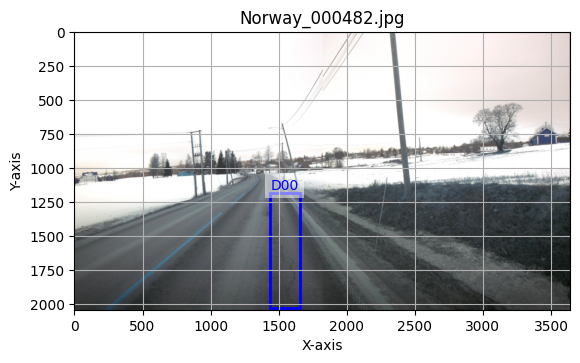

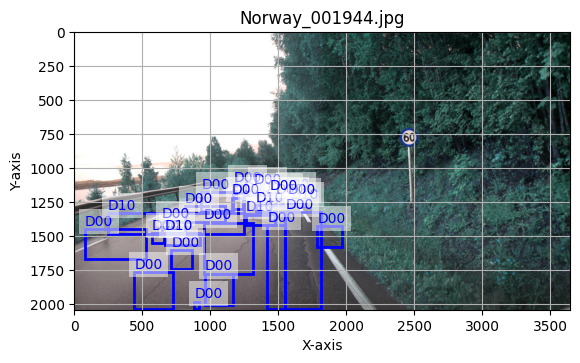

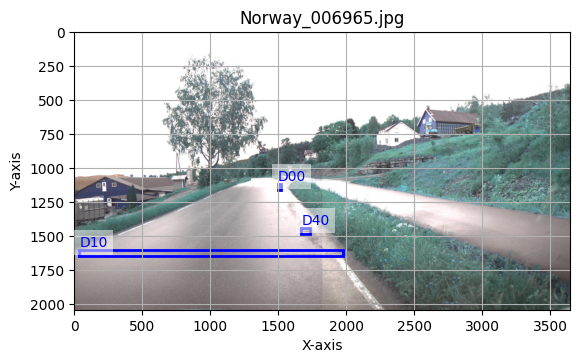

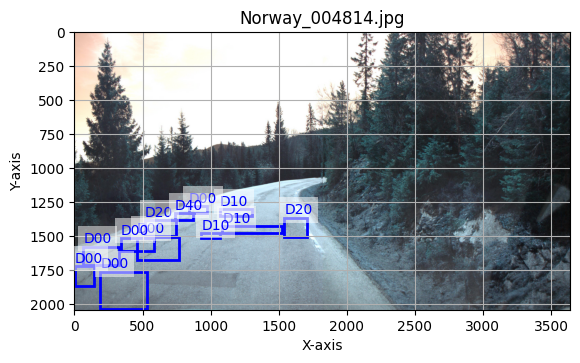

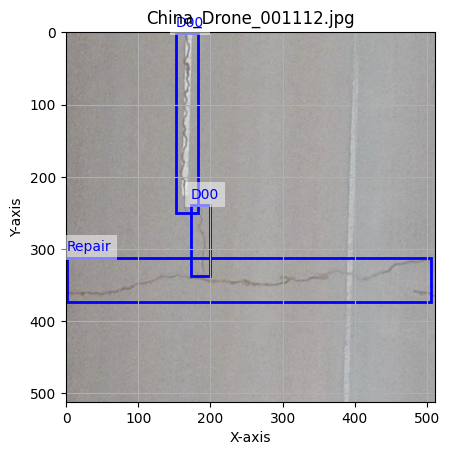

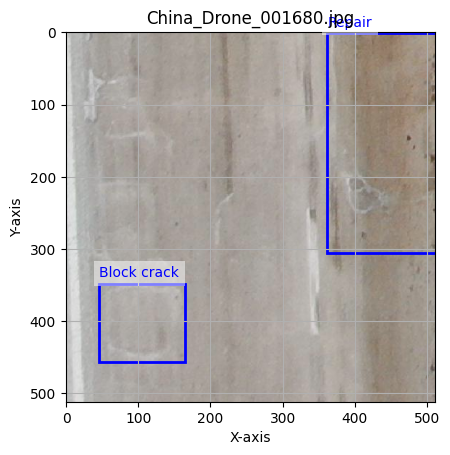

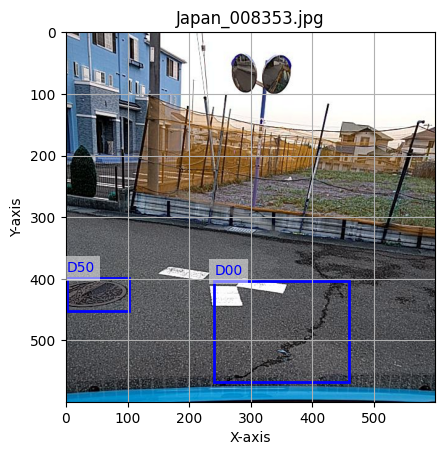

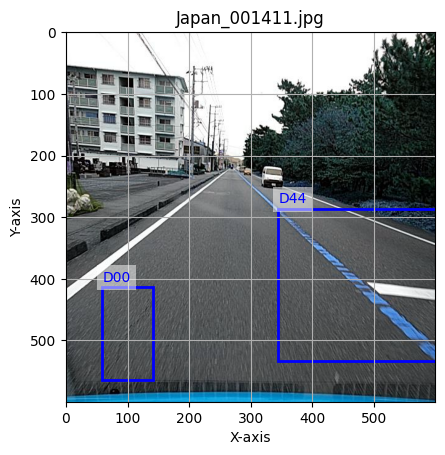

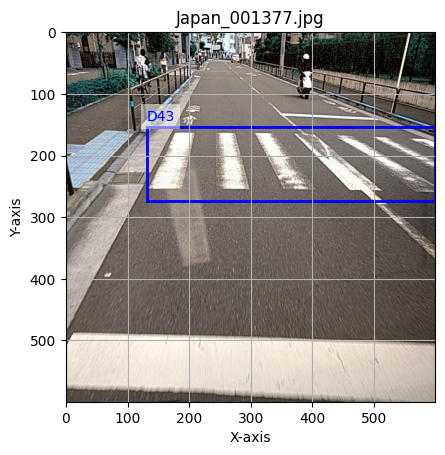

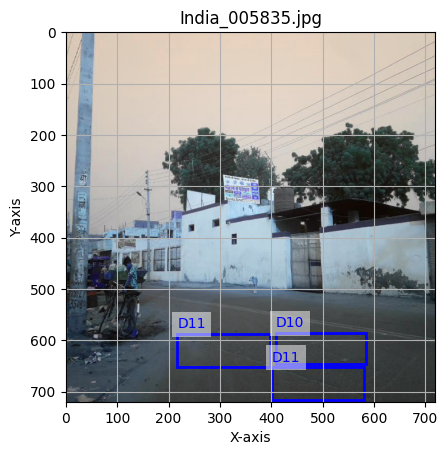

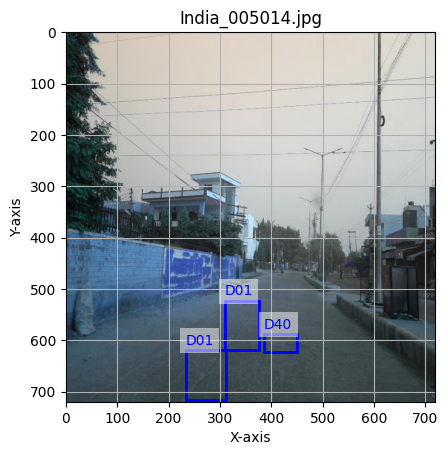

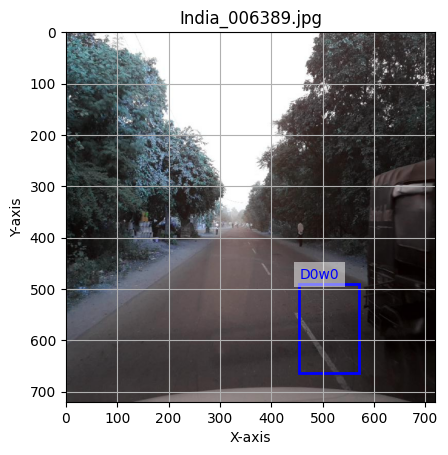

In [55]:
for name in trial["images"]:
    show_img(name,_allXML)

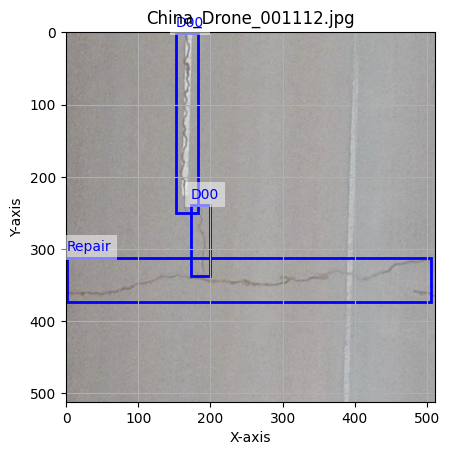

In [6]:
#   PROBLEM 1   ->  USING KNN - HEIRITAGE TO DEFINE THE VALUE !
show_img("China_Drone_001112.jpg",_allXML)

In [ ]:
#   COLLECT ALL TYPE OF DATA WHEN WE HAVE COLLECTED    
TYPE = ["D00","D10","D20","D40"]

In [31]:
def get_xml(file_name,dest_dir): 

    _type = file_name.split('_')[0]
    _next = file_name.split('_')[1]
    if _type == "China" or _type == "United":
        _type = _type + '_' + _next
    path = f"Collect_File/{_type}/train/annotations/xmls/{file_name}.xml"
    tree = ET.parse(path)
    h = int(tree.find("size").find("height").text) 
    w = int(tree.find("size").find("width").text)
    converted_files = []
    result = []

    for obj in tree.findall("object"):
        _type = obj.find("name").text
        if _type in TYPE:
            bbox = obj.find("bndbox")

            xmin = float(bbox.find("xmin").text)
            ymin = float(bbox.find("ymin").text)
            xmax = float(bbox.find("xmax").text)
            ymax = float(bbox.find("ymax").text)
            x_center = (float(xmin + xmax) / 2) / w
            y_center = (float(ymin + ymax) / 2) / h
            ws = (xmax - xmin) / w
            hs = (ymax - ymin) / h

            result.append(f"{TYPE.index(_type)} {x_center} {y_center} {ws} {hs}")

            converted_file = os.path.join(dest_dir, f"{file_name}.txt")
            
            with open(converted_file, "w", encoding="utf-8") as f:
                f.write("\n".join(result))

            converted_files.append(converted_file)
        
    return converted_files

def get_img_path(file_name):
    _type = file_name.split('_')[0]
    _next = file_name.split('_')[1]
    if _type == "China" or _type == "United":
        _type = _type + '_' + _next
    path = f"Collect_File/{_type}/train/images/{file_name}"
    return path

**FILE FORMAT**
|   IMAGE
|     |     China_... .jpg
|     |     China_... .jpg 
|   LABELS
|     |     China_... .txt     
|    
|   
|     
|


In [160]:
#   ONLY RUN 1, CREATE FILE 
input_dir = "Collect_Data"
os.makedirs(input_dir)
os.makedirs(os.path.join(input_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(input_dir, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(input_dir, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(input_dir, "labels", "val"), exist_ok=True)

In [16]:
#   Using sklearn elements for train_valid_test split
import sklearn 
from sklearn.model_selection import train_test_split
import pandas as pd

In [33]:
#   Shuffle The Data 
_allXML["detect"] = [[x for x in inner_list if x["type"] in TYPE] for inner_list in _allXML["detect"]]
print(len(_allXML["detect"]))

Data_df = pd.DataFrame({
        "file_name": _allXML["file_name"],
        "images": _allXML["images"],
        "height": _allXML["height"],
        "width": _allXML["width"],
    })

Label_df = _allXML["detect"]

38385


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data_df,Label_df,test_size=0.2,shuffle=True,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1, shuffle=True,random_state=42) 
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

27637
27637
3071
3071
7677
7677


In [161]:
#   Add To Test
dest_dir = os.path.join("./Collect_Data", "labels", "train")
print(dest_dir)

for idx,row in X_train.iterrows(): 
    get_xml(row["images"].split('.')[0],dest_dir)

./Collect_Data/labels/train


In [ ]:
dest_dir = os.path.join("./Collect_Data", "la", "anno")
print(dest_dir)

for idx,row in X_test.iterrows(): 
    get_xml(row["images"].split('.')[0],dest_dir)

./Collect_Data/test/anno


In [162]:
dest_dir = os.path.join("./Collect_Data", "labels", "val")
print(dest_dir)

for idx,row in X_val.iterrows(): 
    get_xml(row["images"].split('.')[0],dest_dir)

./Collect_Data/labels/val


In [163]:
#add all pictures 
import shutil

dest_dir = os.path.join("./Collect_Data", "images", "train")
print(dest_dir)

for idx,row in X_train.iterrows(): 
    shutil.move(get_img_path(row["images"]),dest_dir) 

dest_dir = os.path.join("./Collect_Data", "images", "val")
print(dest_dir)

for idx,row in X_val.iterrows(): 
    shutil.move(get_img_path(row["images"]),dest_dir) 

# dest_dir = dest_dir = os.path.join("./Collect_Data", "test", "image")
# print(dest_dir)

# for idx,row in X_test.iterrows(): 
#     shutil.move(get_img_path(row["images"]),dest_dir) 



./Collect_Data/images/train
./Collect_Data/images/val


**DATA AUGMENT** (USING DEEP AUGEMNT TO DETECT BEST TYPE FOR AUGMENT DATA)

In [35]:
!{sys.executable} -m pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 227 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 434 kB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 21.3 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 13.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 68.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.2
    Uninstalling numpy-1.23.2:
      Successfully uninstalled numpy-1.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ultralytics 8.3.27 requires numpy<2.0.0; sys_platform == "darwin", but you have numpy 2.0.2 which is incompatible.
tensorflow 2.16.2 requires numpy<2.0.0,>=1.23.5; python_version <= "3.

**MODEL PHRASE**

In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#check for GPUs
import subprocess
import platform
import sys

print(platform.processor())
if platform.system() == "Darwin":
  if "arm" in platform.processor():
    try:
      subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow-macos"])
      subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow-metal"])
      print("Successfully installed tensorflow-macos and tensorflow-metal.")
        
    except subprocess.CalledProcessError as e:
      print("An error occurred during installation:", e)


import tensorflow as tf

devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)

arm
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/tami/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU details:  {'device_name': 'METAL'}


In [ ]:
pip install ultralytics supervision roboflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 878 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 63.9 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 15.8 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.3 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 54.8 MB 8.1 MB/s eta 0:00:011     |██████████████████████████

In [18]:
import torch
device = torch.device("mps")

In [19]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.9.6 torch-2.5.1 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 252.7/460.4 GB disk)


In [145]:
torch.backends.mps.is_available()

True

In [ ]:
# DEMO CODE
input_dir = "Collect_Data_mini"
os.makedirs(input_dir)
os.makedirs(os.path.join(input_dir, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(input_dir, "images", "val"), exist_ok=True)
os.makedirs(os.path.join(input_dir, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(input_dir, "labels", "val"), exist_ok=True)

In [ ]:
# ONLY USE FOR DEMO 
X_train, X_test, y_train, y_test = train_test_split(Data_df,Label_df,test_size=0.9,shuffle=True,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=42) 

In [37]:
dest_dir = os.path.join("./Collect_Data_mini", "labels", "train")
print(dest_dir)

for idx,row in X_train.iterrows(): 
    get_xml(row["images"].split('.')[0],dest_dir)

dest_dir = os.path.join("./Collect_Data_mini", "labels", "val")
print(dest_dir)

for idx,row in X_val.iterrows(): 
    get_xml(row["images"].split('.')[0],dest_dir)

./Collect_Data_mini/labels/train
./Collect_Data_mini/labels/val


In [42]:
import shutil

dest_dir = os.path.join("./Collect_Data_mini", "images", "train")
print(dest_dir)

for idx,row in X_train.iterrows(): 
    shutil.move(get_img_path(row["images"]),dest_dir) 

dest_dir = os.path.join("./Collect_Data_mini", "images", "val")
print(dest_dir)

for idx,row in X_val.iterrows(): 
    shutil.move(get_img_path(row["images"]),dest_dir) 

./Collect_Data_mini/images/train
./Collect_Data_mini/images/val


In [1]:
PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0

In [54]:
#   run 
from ultralytics import YOLO

#   Load a model
model = YOLO("yolo11n.pt")

#   Train the model
results = model.train(data="model.yaml", epochs=20, imgsz=640, device = "mps",close_mosaic=10, batch = 8, augment = True, stream_buffer = True, cache = True)

New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.9.6 torch-2.5.1 MPS (Apple M2)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=model.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=mps, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=True, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

train: Scanning /Users/tami/Documents/Đồ Án/Capstone-Project---Asphalt-Detection/Collect_Data_mini/labels/train.cache... 1931 images, 1139 backgrounds, 0 corrupt: 100%|██████████| 3070/3070 [00:00<?, ?it/s]

train: 4.8GB RAM required to cache images with 50% safety margin but only 2.7/16.0GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /Users/tami/Documents/Đồ Án/Capstone-Project---Asphalt-Detection/Collect_Data_mini/labels/val.cache... 480 images, 288 backgrounds, 0 corrupt: 100%|██████████| 768/768 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 768/768 [00:01<00:00, 622.86it/s] 


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.83G      2.415      4.739      2.111          5        640:  97%|█████████▋| 373/384 [08:01<00:14,  1.29s/it]


KeyboardInterrupt: 

In [45]:
results = model("Collect_Data/images/val/China_Drone_000003.jpg")


image 1/1 /Users/tami/Documents/Đồ Án/Capstone-Project---Asphalt-Detection/Collect_Data/images/val/China_Drone_000003.jpg: 640x640 1 D00, 1 D10, 115.9ms
Speed: 8.5ms preprocess, 115.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [46]:
for result in results:
    boxes = result.boxes 
    masks = result.masks  
    keypoints = result.keypoints  
    probs = result.probs  
    obb = result.obb  
    result.show()  
    # result.save(filename="result.jpg")  


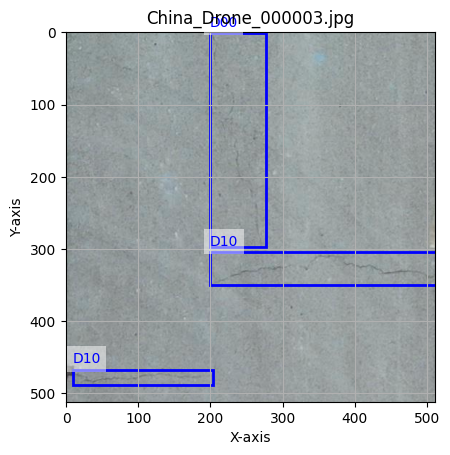

In [8]:
show_img("China_Drone_000003.jpg",_allXML)

In [36]:
%matplotlib inline

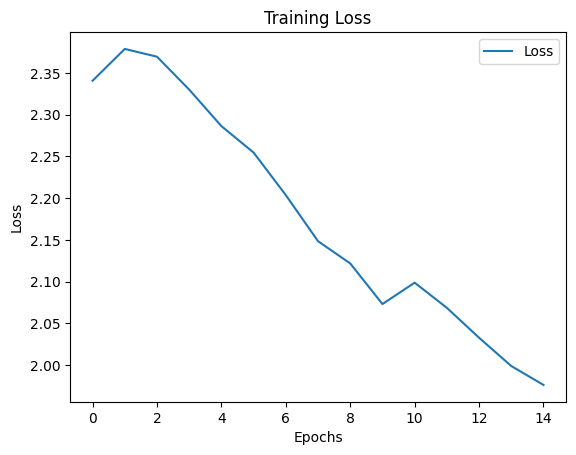

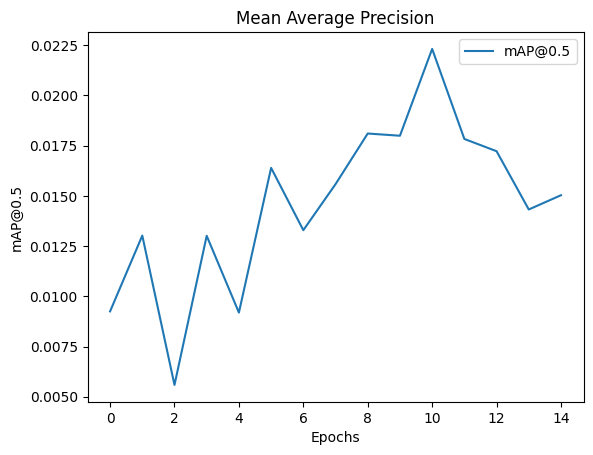

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Load training results
results = []
path = "runs/detect/train/results.csv"

results = pd.read_csv(path)

epochs = range(len(results['metrics/mAP50(B)']))
loss = results['train/box_loss']
map50 = results['metrics/mAP50(B)']

plt.figure()
plt.plot(epochs, loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, map50, label='mAP@0.5')
plt.xlabel('Epochs')
plt.ylabel('mAP@0.5')
plt.title('Mean Average Precision')
plt.legend()
plt.show()

In [39]:
results['F1_score'] = 2 * (results['metrics/precision(B)'] * results['metrics/recall(B)']) / (results['metrics/precision(B)'] + results['metrics/recall(B)'])

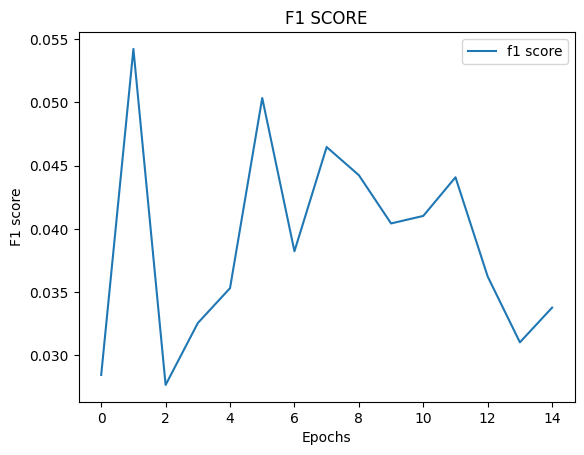

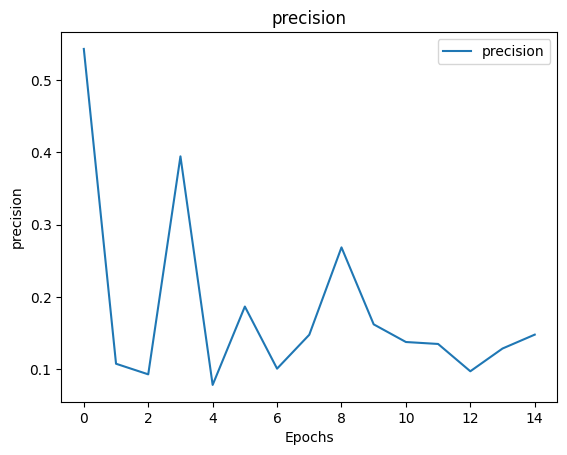

In [43]:
f1 = results["F1_score"]
plt.figure()
plt.plot(epochs, f1, label='f1 score')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('F1 SCORE')
plt.legend()
plt.show()

f1 = results["metrics/precision(B)"]
plt.figure()
plt.plot(epochs, f1, label='precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.title('precision')
plt.legend()
plt.show()

In [48]:
import torchvision 
# from torchvision import FasterRCNN_ResNet50_FPN_Weights

In [ ]:
nd_model = torchvision.models.detection.fasterrcnn_resnet50_fpn()

nd_model.train()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/tami/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 27.1MB/s]


In [52]:
in_features = nd_model.roi_heads.box_predictor.cls_score.in_features
print(in_features)

1024
